In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')


In [ ]:
folder_path = r"C:\\Users\\RoscaMitrut\\Desktop\\CA\\REN-20k\\REN-10k+\\xls"

dataframes = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".xlsx"):
            file_path = os.path.join(root, file)
            try:
                df = pd.read_excel(file_path, sheet_name=0)
                dataframes.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

ren_20k = pd.concat(dataframes, ignore_index=True)

print(f"Combined DataFrame shape: {ren_20k.shape}")


Combined DataFrame shape: (10205, 8)


In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    temp = re.sub(r"[^a-zA-Z0-9 .,!?'\-()]", "", text)
    return temp

for col in ren_20k.columns[:3]:
    ren_20k[col] = ren_20k[col].apply(clean_text)
    

In [18]:
ren_20k

,Title,Abstract,Content,Joy,Sadness,Anger,Fear,Surprise,Title_word_count,Abstract_word_count,Content_word_count
0,Requiem for a generation,Why are many 'veterans' of the fight against ...,A friend sent a YouTube link to the American p...,0.060,0.690,0.190,0.000,0.060,4,27,874
1,U.S. suspends fast-track processing for highly...,The visa is often used by tech firms to recru...,US authorities are temporarily suspending the...,0.286,0.286,0.286,0.143,0.000,9,13,230
2,Duterte to NPA on resuming peace talks Let go ...,"'You are full of hate, then we cannot talk ab...",President Rodrigo Duterte said he is ready to ...,0.348,0.348,0.121,0.061,0.121,11,15,450
3,"DontTakeAwayMyBirthControl Besh, we need to ta...",Sign the petition asking the Supreme Court SC...,"Ok, beshies. I know theres a whole lot of sht ...",0.333,0.111,0.444,0.000,0.111,10,14,516
4,Body of beheaded German hostage found military,(UPDATED) The cadaver of Juergen Kantner is d...,"The military reported on Saturday, March 4, th...",0.043,0.106,0.809,0.021,0.021,7,18,272
...,...,...,...,...,...,...,...,...,...,...,...
10200,New DFA chief Yasay Why be afraid of China?,Foreign Secretary Perfecto Yasay Jr says the P...,Why should we be afraid of China?The new secr...,0.585,0.037,0.256,0.037,0.085,9,24,606
10201,China's president talks tough ahead of tribuna...,'No foreign country... should expect us to swa...,"China will never compromise on sovereignty, Pr...",0.060,0.000,0.881,0.000,0.060,8,25,535
10202,"Taiwan mistakenly fires missile towards China,...",(UPDATED) The Hsiung-feng III (Brave Wind) mis...,A Taiwanese warship mistakenly launched a supe...,0.229,0.125,0.229,0.292,0.125,8,25,523
10203,Why has chess fallen in popularity in the Phil...,Several of the top Filipino chess players have...,Why has chess fallen in popularity in the Phil...,0.063,0.684,0.200,0.021,0.032,9,20,881


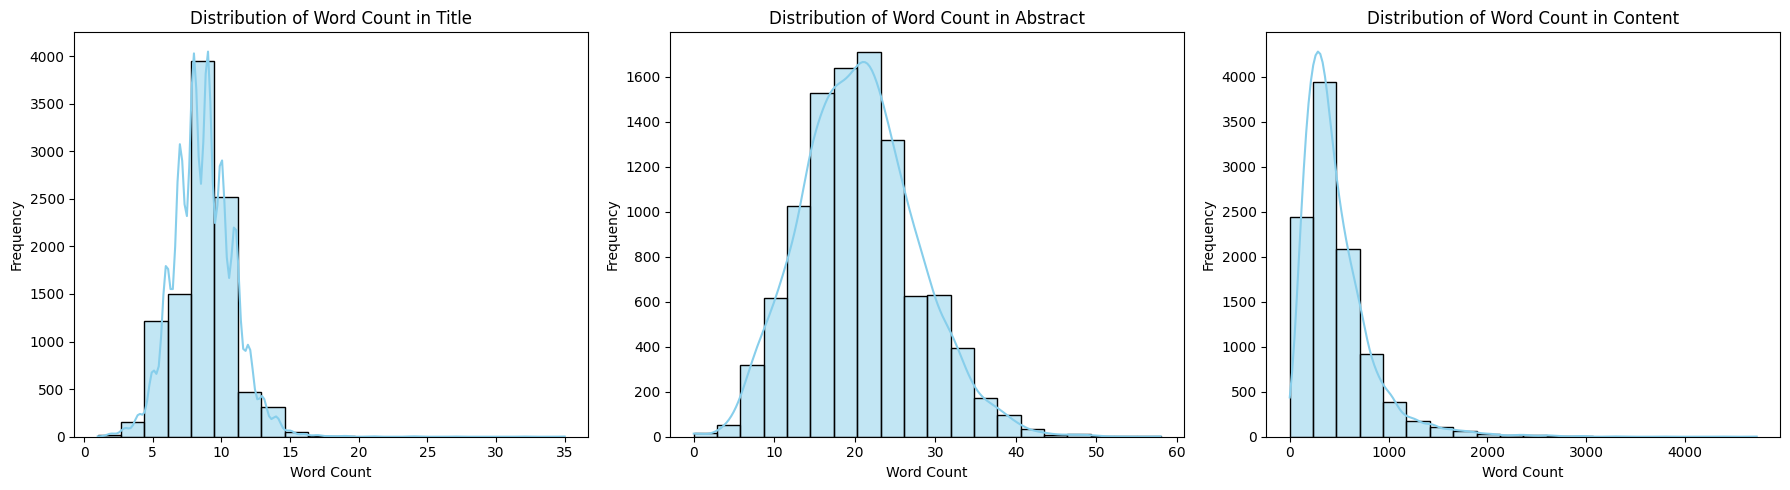

In [ ]:
def calculate_word_count(text):
    if isinstance(text, str):
        return len(text.split())
    return 0

def plot_word_count_histograms(dataframe, columns):
    # Create a figure with 1 row and len(columns) columns
    fig, axes = plt.subplots(1, len(columns), figsize=(18, 5))
    
    # Loop through columns and plot each in its respective subplot
    for i, col in enumerate(columns):
        dataframe[f"{col}_word_count"] = dataframe[col].apply(calculate_word_count)
        sns.histplot(dataframe[f"{col}_word_count"], bins=20, kde=True, color="skyblue", ax=axes[i])
        axes[i].set_title(f"Distribution of Word Count in {col}")
        axes[i].set_xlabel("Word Count")
        axes[i].set_ylabel("Frequency")
    
    # Adjust the layout so titles and labels don't overlap
    plt.tight_layout()
    plt.show()

#text_columns = ["Title", "Abstract", "Content"]
text_columns = ["Content"]
plot_word_count_histograms(ren_20k, text_columns)


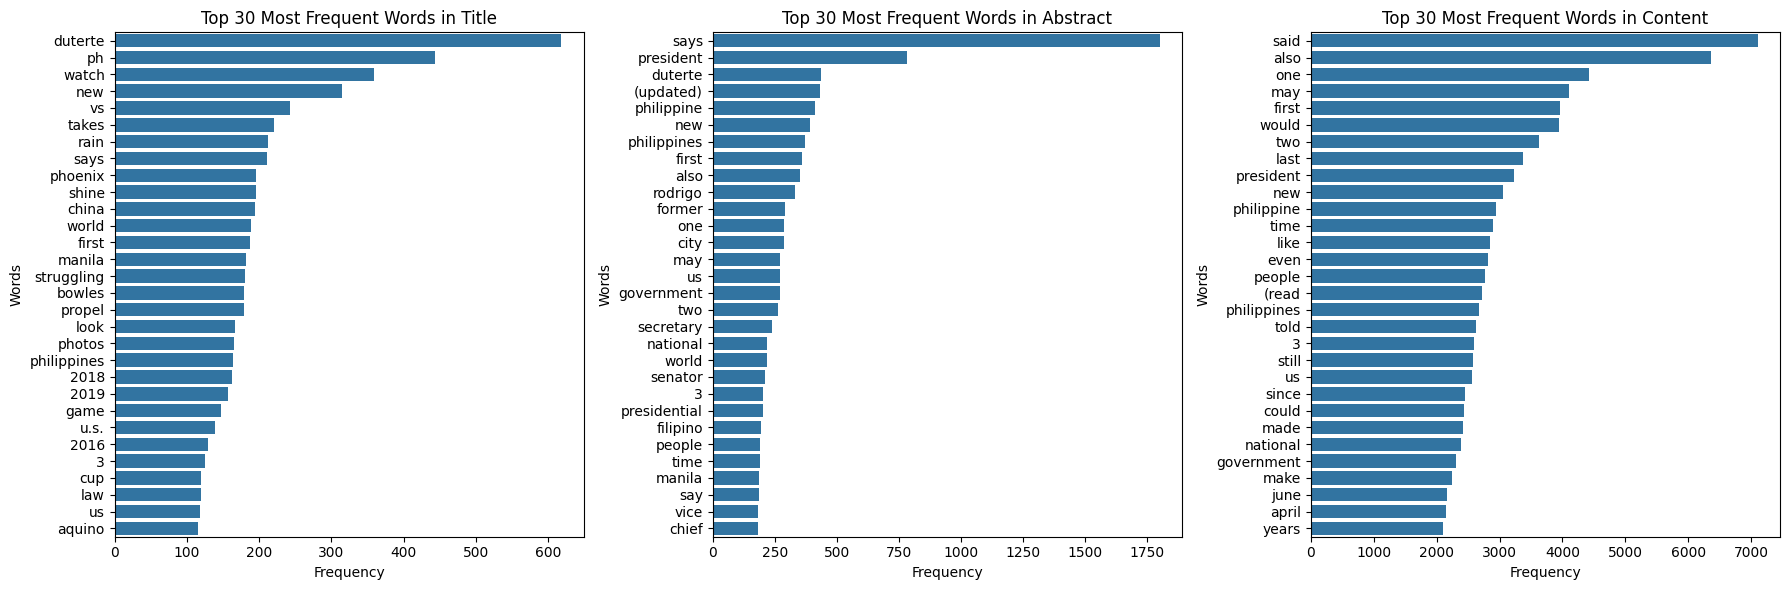

In [17]:
stop_words = set(stopwords.words('english'))

def calculate_word_frequencies(text):
    if isinstance(text, str):
        words = text.lower().split()
        words = [word for word in words if word not in stop_words]
        return Counter(words)
    return Counter()

def plot_top_20_words(dataframe, columns):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
    
    for i, col in enumerate(columns):
        all_words = []
        for text in dataframe[col]:
            all_words.extend(calculate_word_frequencies(text).keys())
        
        word_counts = Counter(all_words).most_common(30)
        
        words, counts = zip(*word_counts)
        
        sns.barplot(x=list(counts), y=list(words), ax=axes[i])
        axes[i].set_title(f"Top 30 Most Frequent Words in {col}")
        axes[i].set_xlabel("Frequency")
        axes[i].set_ylabel("Words")
    
    plt.tight_layout()
    plt.show()

text_columns = ["Title", "Abstract", "Content"]

plot_top_20_words(ren_20k, text_columns)


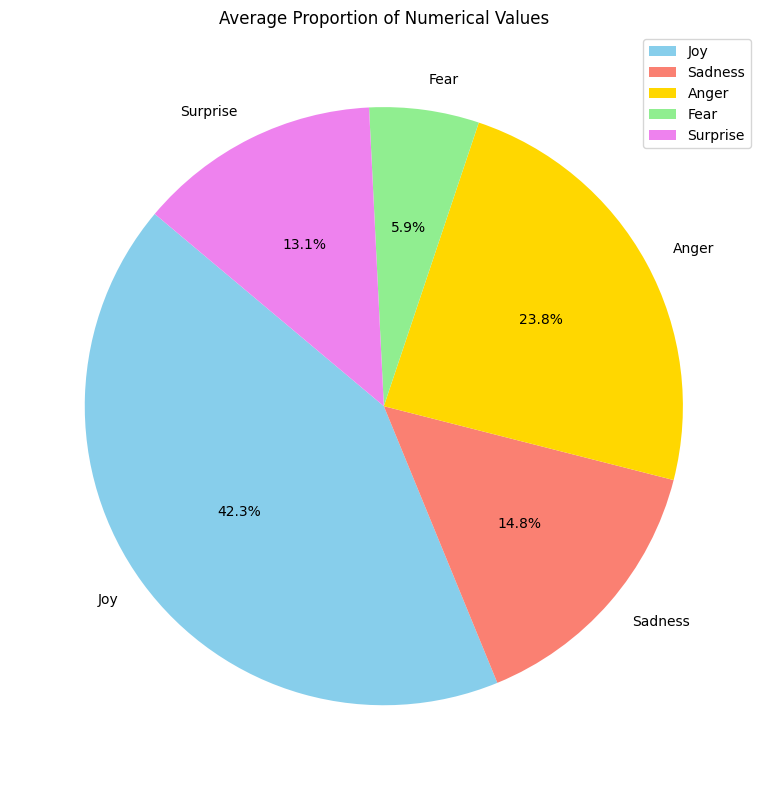

In [ ]:
def plot_average_proportions_pie(dataframe, columns):
    averages = dataframe[columns].mean()
    
    plt.figure(figsize=(8, 8))
    averages.plot(
        kind="pie",
        autopct="%1.1f%%", 
        colors=["skyblue", "salmon", "gold", "lightgreen", "violet"],
        startangle=140,
        legend=True
    )
    plt.title("Average Proportion of Numerical Values")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

numerical_columns = ["Joy", "Sadness", "Anger", "Fear", "Surprise"]

plot_average_proportions_pie(ren_20k, numerical_columns)
